<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What's in this Notebook
The data in this notebook is of *Online Retail of some UK-based*. The data is at transactional level. Here I covered some customer segmentation technique - 
1. Cohort Analysis
2. RFM Analysis
3. k-Means Clustering

Also data pre-processing and cleaning is done first and then all the above discussed technqiue is implemented.<br>
All the necessary steps and explaination is provided with commenting on the code as well.<br>
`If you like this notebook UPVOTE it and for any reviews and doubts please leave a comment`.

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [6]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [7]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder.

In [8]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download vijayuv/onlineretail
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”

100% 7.20M/7.20M [00:00<00:00, 75.2MB/s]
100% 7.20M/7.20M [00:00<00:00, 74.9MB/s]


In [9]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/onlineretail.zip") # esta es la dirección donde esta el zip
datazip.extract("OnlineRetail.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 

'/content/OnlineRetail.csv'

In [10]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.shape

(541909, 8)

In [12]:
# looking at the overall picture
df.info()
# tiene toda la pinta que tenemos valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# voy a cambiar el campo invoicedate a fecha. 
df.InvoiceDate = pd.to_datetime(df.InvoiceDate) # aqui lo estoy convirtiendo

In [14]:
# checking the number of missing values in each column
df.isnull().sum()

# como podemos ver debajo tenemos 1254 description sin valores y y 135080 customerid null

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## BASIC CLEANING

In [15]:
# count of duplicated rows in the data
df.duplicated().sum()

5268

In [16]:
# removing the duplicate rows
df = df[~df.duplicated()]
df.shape
# NOS QUEDAMOS CON 536641 FILAS Y 8 VARIABLES. 

(536641, 8)

In [17]:
# these are the transactions that have negative quantity which indicates returned or cancelled orders
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [18]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True] # diferentes a True para quitarlas
df.shape
# despues de quitarnos las devoluciones el shape es el de debajo. 

(527390, 8)

In [19]:
# checking the number of unique transactions
# though there are more than 5 lakh entries but the number of transaction happened is 21892
df.InvoiceNo.nunique()
# debajo vemos que el numero de facturas unicas es 22064. es decir 22064 facturas generan 527390 filas

22064

In [20]:
# checking the unique stock ids in the data or number of unqiue item sold by retailer
df.StockCode.nunique()
# este el numero de articulos diferentes. 

4059

In [21]:
# top 10 stock ids that sold the most
df.StockCode.value_counts().head(10)
# con esto sacamos por numeros de lineas que articulos son los que más se venden

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: StockCode, dtype: int64

In [22]:
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders
df.Quantity.describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [23]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
df[df['Quantity']<0]
# hay 1336 filas que tienen valores negativos en cantidad. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [24]:
# keeping only those transactions that have successfully ordered
df = df[df['Quantity']>=0]
df.shape
# nos quedamos solo con las positivas

(526054, 8)

In [25]:
print('The minimum date is:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [26]:
# checking the distribution of unit price
df.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
# con esto sacamos los percentiles del precio

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [27]:
# we see that more than 90% have country as UK which is obvious as the retailer is UK based
df.Country.value_counts(normalize=True) # con esto sacamos los pesos por lineas de cada pais. 

# vemos que más del 90% de las transacciones son de United Kingdom. 

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [28]:
# putting UK as one country and combine rest countries into one category
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)
# si es United Kingdom el nombre de country será ese, si no lo es será otro. 

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

In [29]:
# checking the number of unique item list
df.Description.nunique()

4077

In [30]:
# top 10 item sold
df.Description.value_counts().head(10)
# por descripción estos son los que más lineas tienen. 

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

In [31]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
df[df['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [32]:
# removing all the above entries
df = df[df['Description'].str.startswith('?')!=True]
df.shape
# todas aquellas filas con description en interrogación, las quitamos. es decir simpre que sea diferente de true. 

(526048, 8)

In [33]:
# checking the data where description = * and it is noted that customerid is NaN
df[df['Description'].str.startswith('*')==True]
# aqui las que empiezan por *

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [34]:
# replacing with appropriate name
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))
# con esto lo que hacemos en reemplazarlas con otro nombre

In [35]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.islower()==True]['Description'].value_counts()
# aqui todas las descripciones que empiezan por minuscula. 

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [36]:
# removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(525920, 8)

In [37]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: Description, dtype: int64

In [38]:
# removing all the above listed noises
df = df[df['Description'].str.istitle()!=True]
df.shape
# estamos quitando todas las que no empiecen por mayusculas. 

(525452, 8)

In [39]:
df['Description'] = df['Description'].str.strip()

In [40]:
# count of unique customer
df.CustomerID.nunique()  # tenemos 4335 clientes

4335

In [41]:
# checking where customer id is null
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [42]:
# removing entries where customer id is null
df = df[~df.CustomerID.isnull()]
df.shape

(392353, 8)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [44]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
# checking random 5 rows from data
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
482927,577485,23240,SET OF 4 KNICK KNACK TINS DOILY,3,2011-11-20 11:56:00,4.15,16360.0,United Kingdom
437992,574301,20749,ASSORTED COLOUR MINI CASES,4,2011-11-03 16:15:00,7.95,12544.0,Others
492315,578105,23426,METAL SIGN DROP YOUR PANTS,6,2011-11-23 08:47:00,2.89,14911.0,Others
503728,578934,21169,YOU'RE CONFUSING ME METAL SIGN,2,2011-11-27 12:47:00,1.69,14577.0,United Kingdom
82487,543235,21068,VINTAGE BILLBOARD LOVE/HATE MUG,2,2011-02-04 13:30:00,1.25,14462.0,United Kingdom


## EDA

In [46]:
# creating some columns for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year # sacamos el año de la fecha
df['month'] = df['InvoiceDate'].dt.month # sacamos el mes
df['day'] = df['InvoiceDate'].dt.day # sacamos el día. 
df['hour'] = df['InvoiceDate'].dt.hour # sacamos la hora
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek # sacamos el día de la semana. 

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


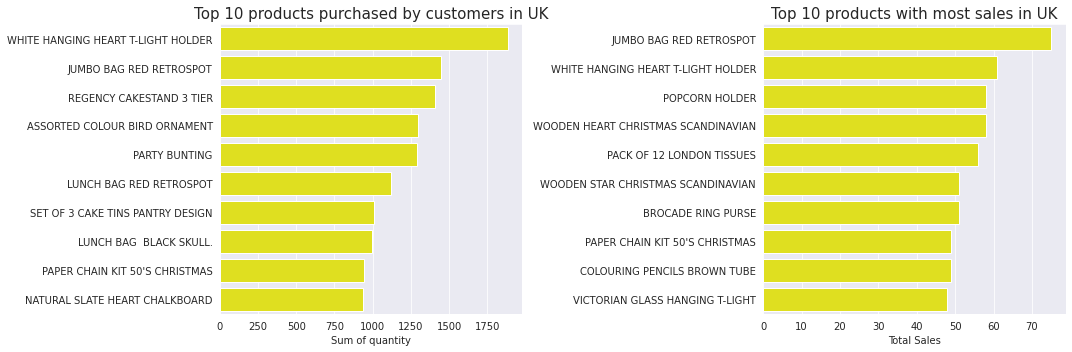

In [48]:
column = ['InvoiceNo','Amount']  # prefijamos las dos variables que vamos a coger, metiendolas en una varialbes que es una lista. 

plt.figure(figsize=(15,5)) # tamaño del gráfico
for i,j in enumerate(column): # para cada fila y columna. Enumerate  es una función. añade un contador a un iterable y lo devuelve en objeto de enumeración. 
    plt.subplot(1,2,i+1) 
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values, # aqui actua sobre los valores
                # si la ciudad es igual a united kingdom agrupar por columna description. valores unicos, ordenar
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index, # aqui actua sobre el index. 
                # si es united kingdom agrupar por columna description, valores unicos, ordenar. 
                color='yellow')
    plt.ylabel('')  # parametros de la etiqueta y
    if i==0: # si la columna es invoiceNo, ya que esta en la lista de arriba colum como la primera. 
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

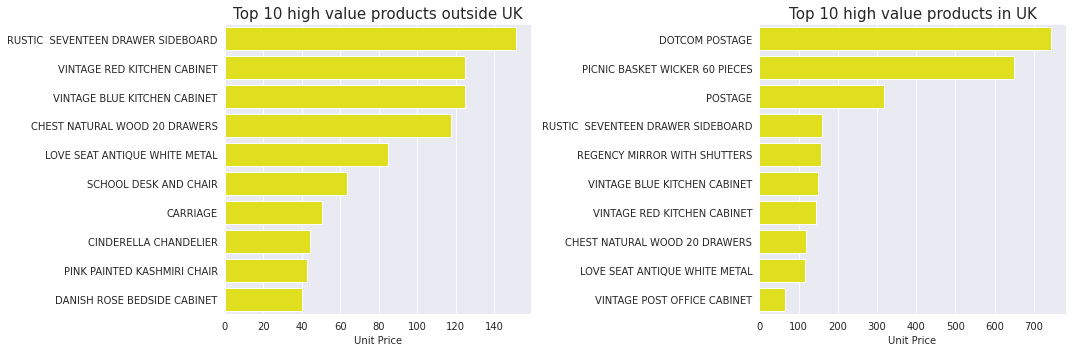

In [49]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

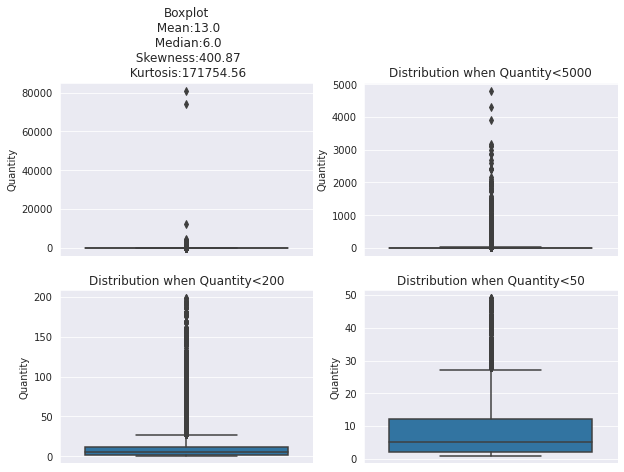

In [50]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df.Quantity.skew(),2) # calculamos el skewness
kurtosis = round(df.Quantity.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df.Quantity),0) # calculamos la media
median = np.median(df.Quantity) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos de cantidad.

In [51]:
# removing the expectional case where quantity > 70000
df = df[df['Quantity']<70000]

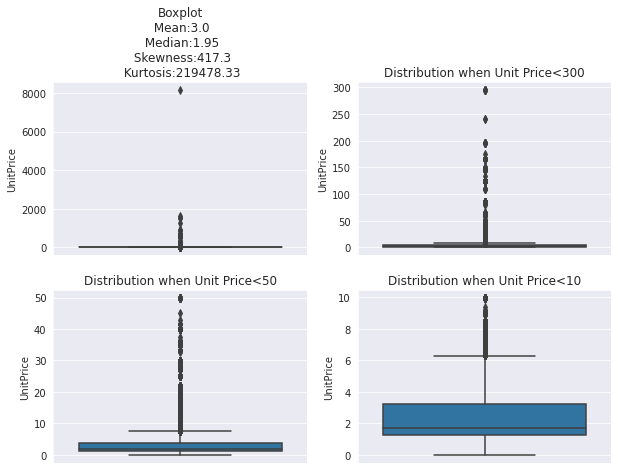

In [52]:
# Looking the distribution of column Unit Price
plt.figure(figsize=(10,7))

skewness = round(df.UnitPrice.skew(),2)
kurtosis = round(df.UnitPrice.kurtosis(),2)
mean = round(np.mean(df.UnitPrice),0)
median = np.median(df.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=df.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when Unit Price<300')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when Unit Price<50')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when Unit Price<10')

plt.show()

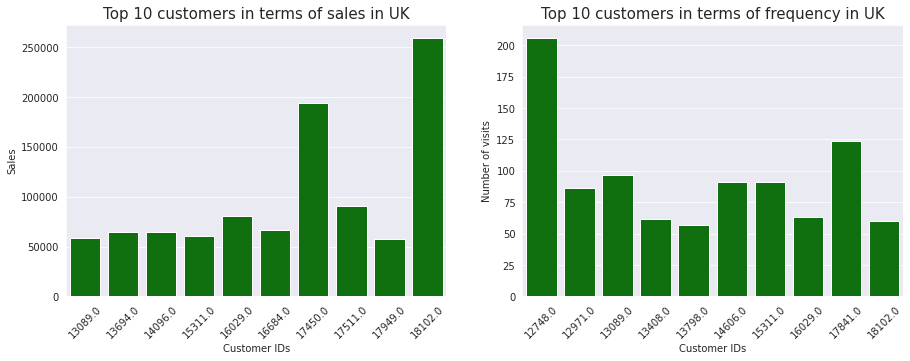

In [53]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que estamos haciendo es sumar la cantidad .
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

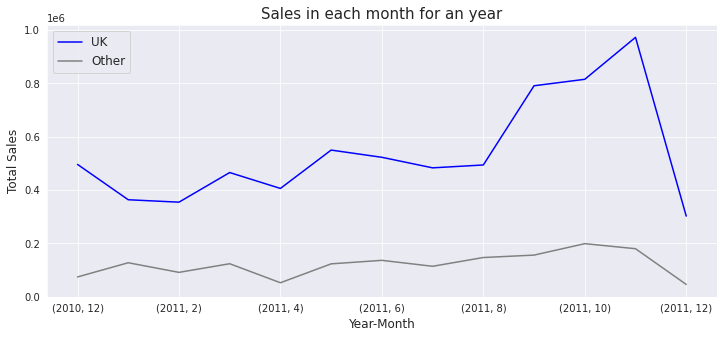

In [54]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
# agrupamos por año y mes y sumamos la cantidad. En este United Kingdom
df[df['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
# lo mismo que el anterior pero en este others. 
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

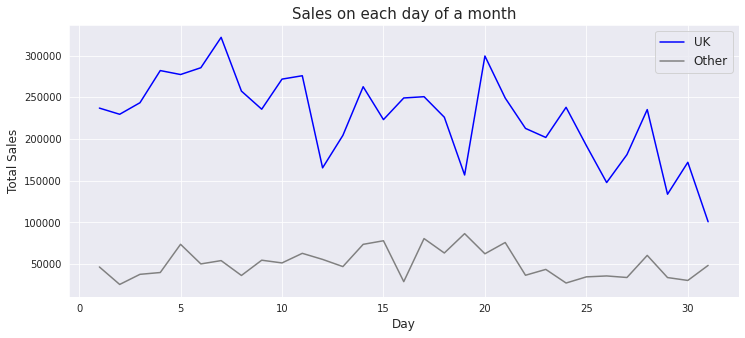

In [55]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()
# en este caso por día y cantidad. 

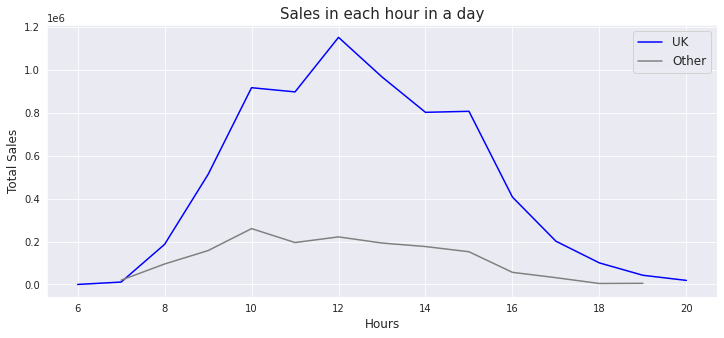

In [56]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()
# agrupado por hora y cantidad. 

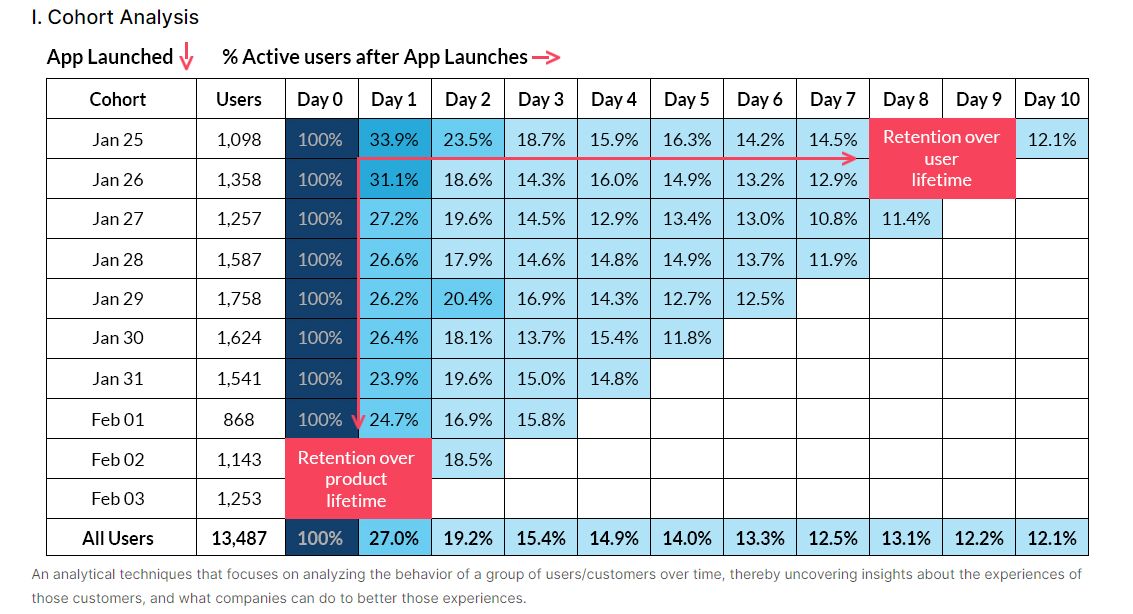

- hacia la derecha clientes que repiten. 
- hacia abajo clientes nuevos. 

- tipos de cohorts.
    - Cohorts de tiempo. son clientes que se suscriben a un producto o servicio durante un tiempo determinado. Muestra los datos en función de cuando empezaron a usarlos. 
    - Behaviour cohorts. agrupa a los clientes por el tipo de producto o servicio que contrataron. Según el producto al que se suscribieron pueden tener necesidades diferentes. comprender las necesidades de cada uno puuede ayudar a la empresa a incrementar la retención de los mismos. 
    - Tamaño cohorts. se refiere a los distintos tamaños de los clientes que compran el producto o servicio. puede basarse en la cantidad del gasto en un periodo de tiempo. Podríamos sacar que el gasto se produce en un periodo concreto. 

In [57]:
# copying the data into new df
df_cohort = df.copy()
# select only limited columns
df_cohort = df_cohort.iloc[:,:9]
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [58]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m') # lo convierte en formato strftime 
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [59]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [60]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392351 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392351 non-null  object        
 1   StockCode     392351 non-null  object        
 2   Description   392351 non-null  object        
 3   Quantity      392351 non-null  int64         
 4   InvoiceDate   392351 non-null  datetime64[ns]
 5   UnitPrice     392351 non-null  float64       
 6   CustomerID    392351 non-null  float64       
 7   Country       392351 non-null  object        
 8   Amount        392351 non-null  float64       
 9   InvoiceMonth  392351 non-null  datetime64[ns]
 10  CohortMonth   392351 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 35.9+ MB


In [61]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [62]:
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceMonth,CohortMonth,CohortPeriod
425889,573340,35923,CANDY HEART HANGING DECORATION,9,2011-10-30 11:55:00,0.39,14159.0,United Kingdom,3.51,2011-10-01,2010-12-01,10
467523,576353,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,2011-11-14 16:17:00,1.45,15050.0,United Kingdom,52.20,2011-11-01,2011-09-01,2
69732,541980,POST,POSTAGE,1,2011-01-24 15:09:00,28.00,12421.0,Others,28.00,2011-01-01,2011-01-01,0
132233,547658,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2011-03-24 13:04:00,4.95,13736.0,United Kingdom,9.90,2011-03-01,2011-03-01,0
346823,567206,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-09-19 10:51:00,2.08,13562.0,United Kingdom,20.80,2011-09-01,2011-04-01,5


In [63]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,884.0,323.0,286.0,339.0,321.0,352.0,320.0,308.0,312.0,349.0,330.0,444.0,234.0
2011-01-01,415.0,91.0,111.0,96.0,132.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,109.0,103.0,94.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por mes o por fecha. 
        - por ejemplo 884 es el numero de clientes adquiridos en diciembre del 2010. 415 son los nuevos clientes diferentes en el siguiente mes, diferentes de los de diciembre del 2010, y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo. de los clientes de diciembre del 2010 (884) al siguiente mes compraron 323 y 286 después de dos meses y así sucesivamente. 

In [64]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.5,32.4,38.3,36.3,39.8,36.2,34.8,35.3,39.5,37.3,50.2,26.5
2011-01-01,100.0,21.9,26.7,23.1,31.8,28.9,24.8,24.1,29.9,32.8,36.6,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.7,27.1,24.7,25.5,27.4,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,14.8,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.0,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.1,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.2,20.9,22.5,27.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- podemos ver que en enero del 2011 adquiere nuevos clientes pero luego solo el 21,9 por ciento vuelven a comprar un mes después. a los dos meses es de 26.7 por ciento. 

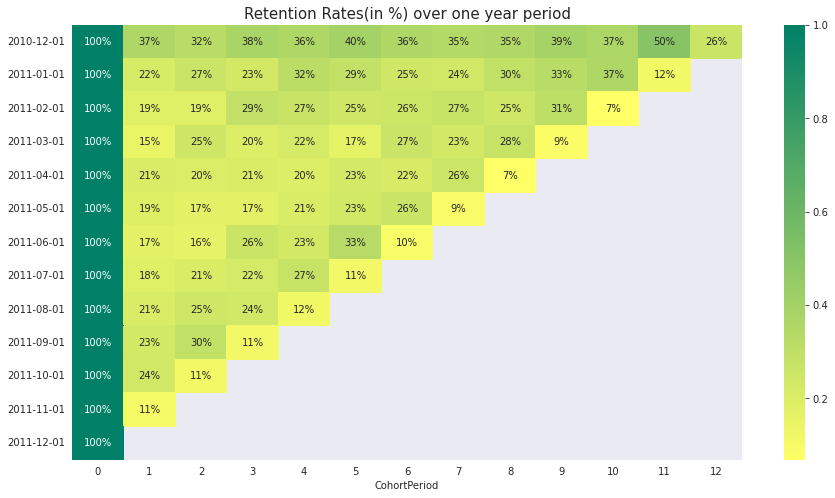

In [65]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 

In [66]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.23,27.28,26.87,26.90,21.16,28.14,28.29,27.40,28.99,33.44,33.73,23.56,25.8
2011-01-01,19.79,24.47,20.98,28.66,22.40,26.29,25.25,25.39,19.09,21.14,19.73,19.78,NaN
2011-02-01,18.00,20.30,20.49,19.49,17.69,16.97,22.33,22.61,18.80,22.19,23.50,NaN,NaN
2011-03-01,17.55,20.35,22.58,18.03,20.96,19.00,22.04,19.68,16.80,13.19,NaN,NaN,NaN
2011-04-01,16.89,20.85,19.50,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,19.90,17.36,22.29,20.91,18.61,14.11,17.02,14.06,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.00,16.31,19.95,20.46,15.35,16.32,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.88,23.53,11.80,13.03,10.90,11.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.89,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la pivot table de arriba representa la media de cantidad gastada por el grupo de clientes durante el periodo de tiempo. 
- por ejemplo el grupo de clientes de enero del 2011, inicialmente gastaban 19.57 pero después de un mes gastan 24.22 y en el siguiente 20.83 y así sucesivamente. 

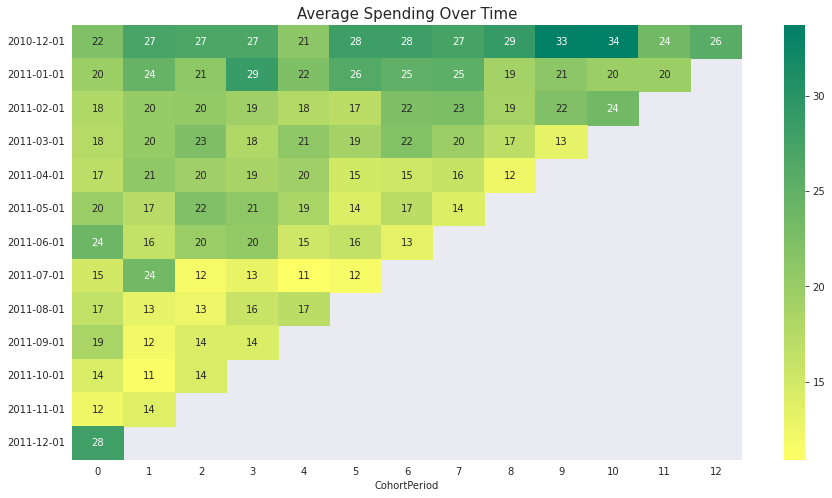

In [67]:
#Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

# RFM ANALISIS

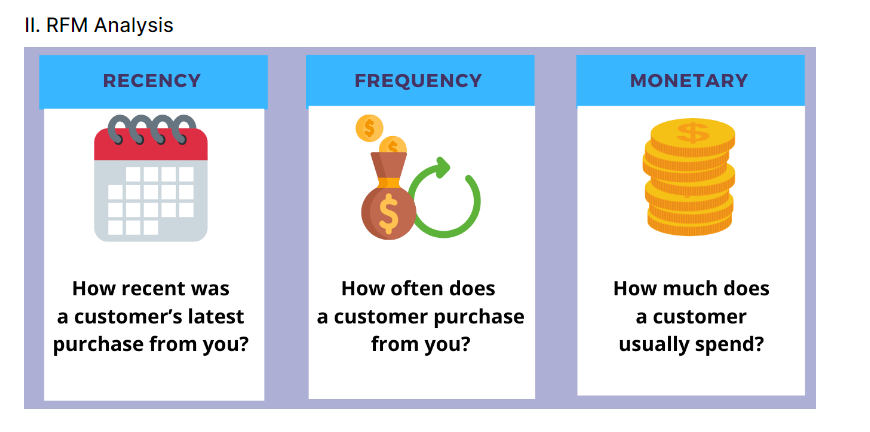

- Recency. Cuanto tiempo ha transcurrido desde la última transaccion. lo normal es que cuanto más reciente es la compra, mas receptivo esta el cliente a recibir comunicaciones. 
- Frecuency. Cuanto mayor es la frecuencia, mayor lealtad. los clientes de una sola vez están en una clase diferente.
- Monetary. Refleja cuanto dinero ha gastado un cliente en un periodo determinado. El dinero gastado dividido la frecuencia indica el gasto medio por compra, un factor secuendario a la hora de segmentar. 

In [68]:
# copying the data in other df
df_rfm = df.copy()
# keeping only desired columns
df_rfm = df_rfm.iloc[:,:9]
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [69]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
# creamos la variable recency
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['InvoiceDate'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1 # diferencia entre el máximo y la fecha de la factura. 
recency = recency[['CustomerID','recency']] # elegimos las variables a mostrar. 
recency.head()

,CustomerID,recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37


In [70]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [71]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


In [72]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad de visita. 

In [73]:
# extracting SPEED OF VISIT

customer_list = list(df_rfm.CustomerID.unique()) # creamos una lista con unicos de CustomerId. 
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in customer_list:  # vamos a recorrer la lista de arriba. es decir la columna de CustomerID
    sov = df_rfm[df_rfm['CustomerID']==ids].groupby('InvoiceDate')['InvoiceNo'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm.CustomerID que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por InvoiceDate e InvoiceNo y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['InvoiceDate1'] = sov['InvoiceDate'].shift(1) # generamos Invoicedate1 que es el dato desplazado una posición
        sov['Difference'] = (sov['InvoiceDate']-sov['InvoiceDate1']).dt.days # generamos otra difference que es la diferencia entre InvoiceDate y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sCustomerID'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sCustomerID').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sCustomerID,sov
0,12347.0,60.0
1,12348.0,94.0
2,12349.0,0.0
3,12350.0,0.0
4,12352.0,43.0


In [74]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4334 non-null   float64
 1   recency     4334 non-null   int64  
 2   frequency   4334 non-null   int64  
 3   monetary    4334 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.6 KB


In [75]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,recency,frequency,monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.461698,93.171897,4.258191,1981.251445
std,1721.689380,100.122257,7.658263,8527.197292
min,12347.000000,1.000000,1.000000,0.000000
25%,13812.250000,18.000000,1.000000,305.867500
50%,15297.500000,51.000000,2.000000,666.875000
75%,16778.750000,143.000000,5.000000,1649.155000
90%,17685.700000,264.000000,9.000000,3613.486000
95%,17984.350000,312.000000,13.000000,5728.081000
99%,18225.670000,369.000000,30.000000,18315.474900


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [76]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
# hacemos los cortes por los estadísticos de arriba. 
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [77]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   recency          4334 non-null   int64  
 2   frequency        4334 non-null   int64  
 3   monetary         4334 non-null   float64
 4   recency_score    4334 non-null   int64  
 5   frequency_score  4334 non-null   int64  
 6   monetary_score   4334 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.1 KB


In [78]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
# esta función suma los tres valores. 
rfm['score'] = rfm.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
0,12347.0,3,7,4310.00,5,4,5,14.0
1,12348.0,76,4,1797.24,3,3,4,10.0
2,12349.0,19,1,1757.55,4,1,4,9.0
3,12350.0,311,1,334.40,1,1,2,4.0
4,12352.0,37,7,1665.74,4,4,4,12.0


In [79]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4334.000000
mean        8.413013
std         3.309021
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: score, dtype: float64

In [80]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,customer_type
0,12347.0,3,7,4310.00,5,4,5,14.0,Platinum
1,12348.0,76,4,1797.24,3,3,4,10.0,Silver
2,12349.0,19,1,1757.55,4,1,4,9.0,Silver
3,12350.0,311,1,334.40,1,1,2,4.0,Bad
4,12352.0,37,7,1665.74,4,4,4,12.0,Gold


In [81]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: customer_type, dtype: float64

- podemos ver el 9% son platinum, que combinados con los gold suman el 19%. estos son los mejores clientes. 
- los silver son aquellos en los que podemos enfocarnos para convertirlos en gold o platinum. 
- los bad son aquellos que no están comprometidos con el negocio y no ponen mucho esfuerzo por venir. 

In [82]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
Bad,188.0,1.0,297.0
Bronze,78.0,2.0,621.0
Silver,44.0,4.0,1416.0
Gold,20.0,7.0,2863.0
Platinum,10.0,19.0,12111.0


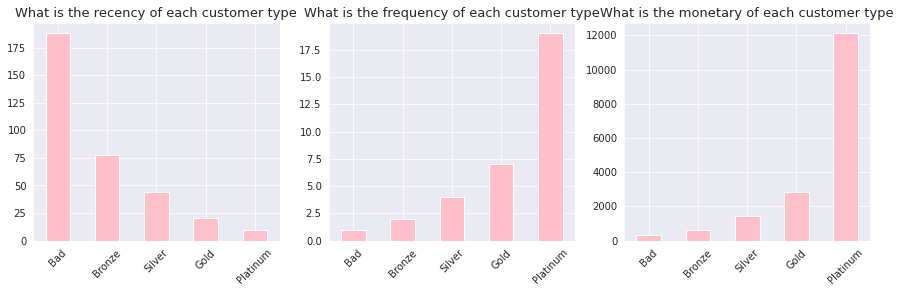

In [83]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

- los platinum son los que menos recency tienen, es decir que el tiempo desde la ultima visita es menor. 
- la frecuencia de los platinum es la mayor en torno a 18 veces.
- y la facturación en los platinum está en torno a los 12.000

# KMEANS

- primero vamos a inicializar k puntos, llamados means, aleatoriamente
- clasificamos cada elemento a su media más cercana y actualizamos las coodenadas de la media, que son los promedios de los elementos categorizados en esa media hasta el momento.
- repetimos el proceso para un numero determinado de iteraciones y al final tenemos nuestros clientes. 


## K-MEANS CLUSTERING

In [84]:
# copying the data into new variable
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74


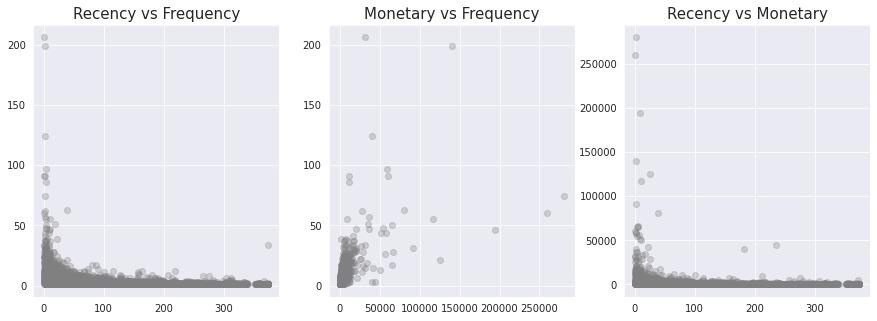

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) # UNA FILA, TRES GRAFICOS POR FILA, Y LO HACEMOS EN LA PRIMERA. 
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3) # en este primero metemos el kmeans de recency y frecuenciy 
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3) # en este segundo metemos monetary y frecuency
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3) # en el tercero recency vs monetary
plt.title('Recency vs Monetary', size=15)
plt.show()

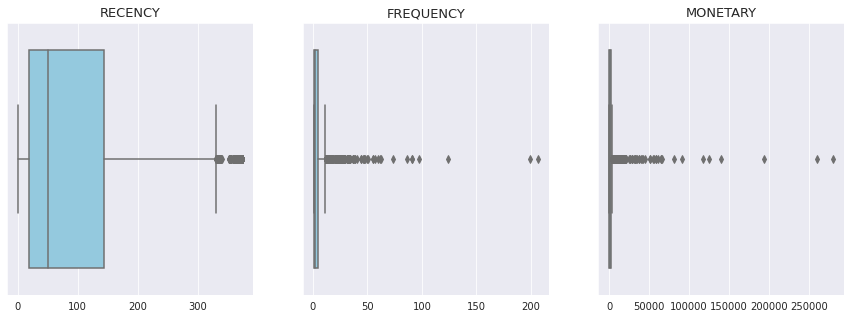

In [87]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [88]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [89]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   recency     4259 non-null   int64  
 2   frequency   4259 non-null   int64  
 3   monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [90]:
# looking at random 5 rows
df_kmeans.sample(5)

,CustomerID,recency,frequency,monetary
1739,14764.0,47,1,278.30
1852,14930.0,109,3,2362.96
556,13101.0,235,1,101.19
2218,15429.0,27,2,397.35
2738,16152.0,269,1,1829.04


In [91]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912760,0.877595,1.680623
1,-0.184490,0.098534,0.272852
2,-0.753139,-0.680528,0.250616
3,2.159940,-0.680528,-0.546702
4,-0.573566,0.877595,0.199179


- inicialmente sin ningún conocimiento estamos clusterizando los datos en 5 clusters. La unica intuición que tenemos es RFM, con lo cual categorizamos en 5.
- mas tarde veremos más metodos para optimizar el valor de K

In [92]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [93]:
# checking the labels
model_clus5.labels_

array([4, 2, 3, ..., 3, 4, 2], dtype=int32)

In [94]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,4
1,76,4,1797.24,2
2,19,1,1757.55,3
3,311,1,334.40,1
4,37,7,1665.74,2


In [95]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,14.0,18.0,8775.0
1,254.0,1.0,434.0
2,34.0,6.0,2014.0
3,55.0,2.0,574.0
4,24.0,11.0,4297.0


- metodo del codo

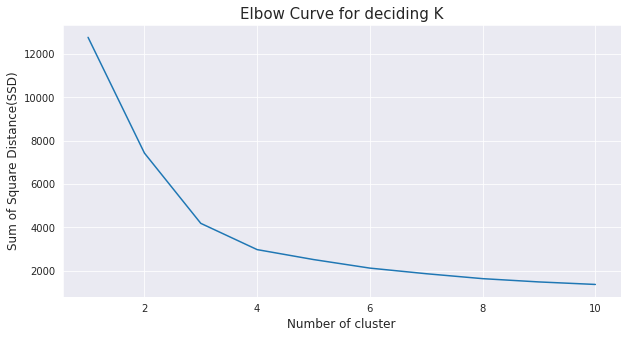

In [96]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

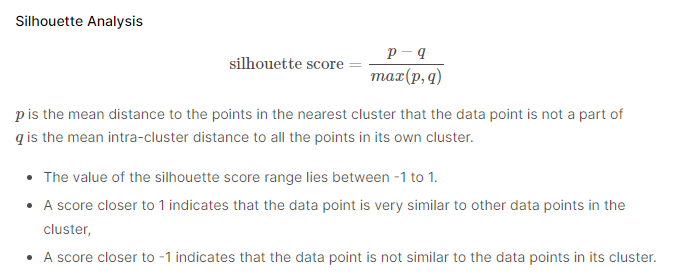

In [97]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5460929706945657
For n_clusters=3, the silhouette score is 0.5106873096282818
For n_clusters=4, the silhouette score is 0.4865715970728021
For n_clusters=5, the silhouette score is 0.44185916176884094
For n_clusters=6, the silhouette score is 0.4170067324321084
For n_clusters=7, the silhouette score is 0.41756764745297315
For n_clusters=8, the silhouette score is 0.3867122817708356
For n_clusters=9, the silhouette score is 0.38928940644370413
For n_clusters=10, the silhouette score is 0.36714872820875977


- el el grafico del codo vemos que esat entre el 3 y 4 
- también vemos que es mejor 3 que 4
- por lo tanto vamos a categorizar en 3

In [98]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [99]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,1
1,76,4,1797.24,0
2,19,1,1757.55,0
3,311,1,334.40,2
4,37,7,1665.74,0


In [100]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,47.0,3.0,1016.0
1,21.0,12.0,5412.0
2,249.0,1.0,434.0


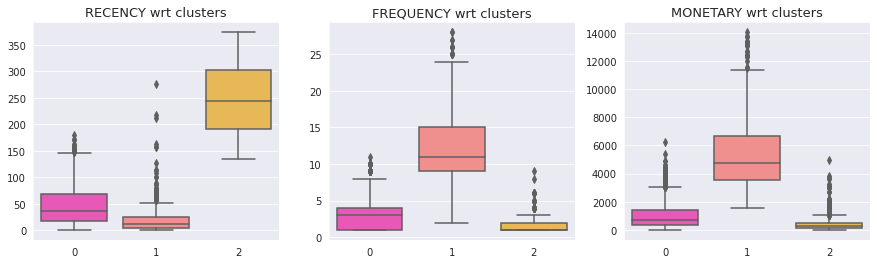

In [101]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

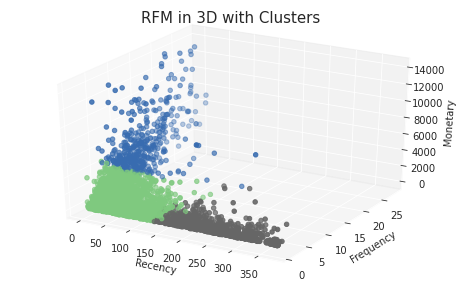

In [102]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()